# Analysis of simplistic plate wings on an ellipsoid

Purpose of experiment is to see if any of the effects of the wings on Bernard can be replicated by attaching dummy wings to an ellipsoid

Need to load:

    - Ellipsoid
    - Bernard body_wings
    - Ellipsoid wings x6


In [1]:
import sys
sys.path.append('/Users/sstk4353/packages/.')

from WIPL_python_analysis.SinglePolPlots import SinglePolPlots
from WIPL_python_analysis.DualPol import DualPol
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter
import WIPL_python_analysis.helper_functions as hf
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('./')

In [2]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'
BERNARD_PATH = 'Bernard/'
ELLIPSOID_PATH = 'Ellipsoid/'

In [3]:
pol_list = ['H', 'V']
results_list = [
    'Bernard_body', 
    'Bernard_body_wing', 
    'Prolate spheroid', 
    'Prolate spheroid cuboid wings up',
    'Prolate spheroid cuboid wings down',
    'Prolate spheroid cuboid wings mid',
    ]

In [4]:
data_dict = {x : {y: None for y in results_list} for x in pol_list}

In [5]:
for pol in pol_list:
    BODY_PATH = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/morpho_analysis/Bernard_parameterised_560_{pol}_M_1000_body_p0_s0_df.csv'
    data_dict[pol]['Bernard_body'] = pd.read_csv(BODY_PATH)

    BODY_WING_PATH = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/morpho_analysis/Bernard_parameterised_560_{pol}_M_1000_body_wing_p0_s0_df.csv'
    data_dict[pol]['Bernard_body_wing'] = pd.read_csv(BODY_WING_PATH)

    ELLIPSOID_BODY_PATH = BASE_DRIVE_PATH + ELLIPSOID_PATH + f'parameterised/csv/Ellipsoid_parameterised_560_{pol}_1000_p0_s0__df.csv'
    data_dict[pol]['Prolate spheroid'] = pd.read_csv(ELLIPSOID_BODY_PATH)

In [6]:
base_path = BASE_DRIVE_PATH + ELLIPSOID_PATH + 'Ellipsoid_wing/Ellipsoid_wings_'

for pol in pol_list:
    for wing_pos, wing_pos_name in zip(['U', 'D', 'M'], ['up', 'down', 'mid']):
        path = base_path + f'{wing_pos}_{pol}.pkl'
        conv = converter.from_pickle(path)
        df = conv.generate_output_df()
        
        output_path = path + f'{wing_pos}_{pol}.csv'
        df.to_csv(output_path)
        data_dict[pol][f'Prolate spheroid cuboid wings {wing_pos_name}'] = df

In [7]:
vars_list = ['HH_power', 'VV_power', 'Zdr', 'LDR', 'HH_phase', 'VV_phase', 'PhiDP']

In [8]:
results_dict = {y : {z : None for z in vars_list} for y in results_list}


for morpho in results_list: 
    results_dict[morpho]['HH_power'] = hf.get_horizontal_returned_power(data_dict['H'][morpho])
    results_dict[morpho]['VV_power'] = hf.get_vertical_returned_power(data_dict['V'][morpho])
    results_dict[morpho]['HH_phase'] = hf.get_horizontal_returned_phase(data_dict['H'][morpho])
    results_dict[morpho]['VV_phase'] = hf.get_vertical_returned_phase(data_dict['V'][morpho])
    results_dict[morpho]['LDR'] = hf.get_linear_depol_ratio(data_dict['H'][morpho])

    dp = DualPol(data_dict['H'][morpho], data_dict['V'][morpho], read_from_df=True)
    dp._calculate_differential_reflectivity()
    dp._calculate_differential_phase()

    results_dict[morpho]['Zdr'] = dp.differential_reflectivity
    results_dict[morpho]['PhiDP'] = dp.differential_phase

In [9]:
compare_to_bernard_and_ellipsoid_list = [
    'Bernard_body', 
    'Bernard_body_wing', 
    'Prolate spheroid', 
    'Prolate spheroid cuboid wings mid',
    ]

position_variation_list = [
    'Prolate spheroid cuboid wings up',
    'Prolate spheroid cuboid wings down',
    'Prolate spheroid cuboid wings mid',
]

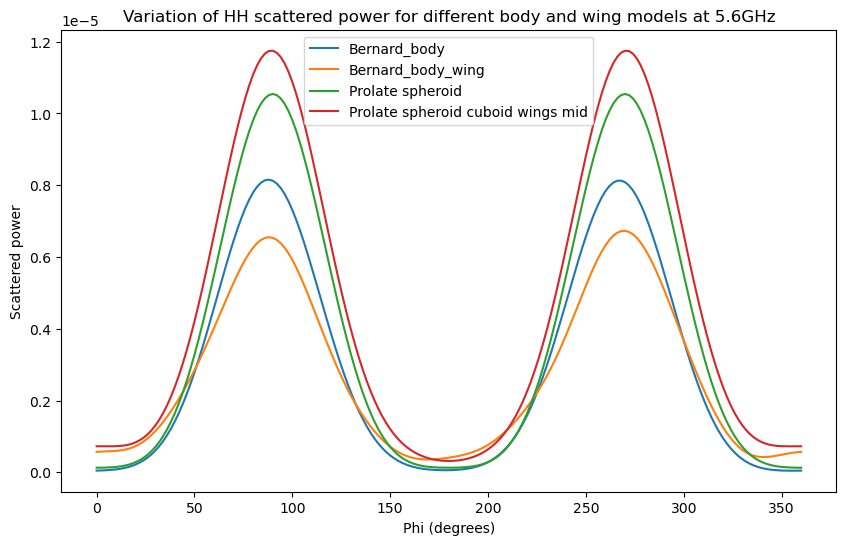

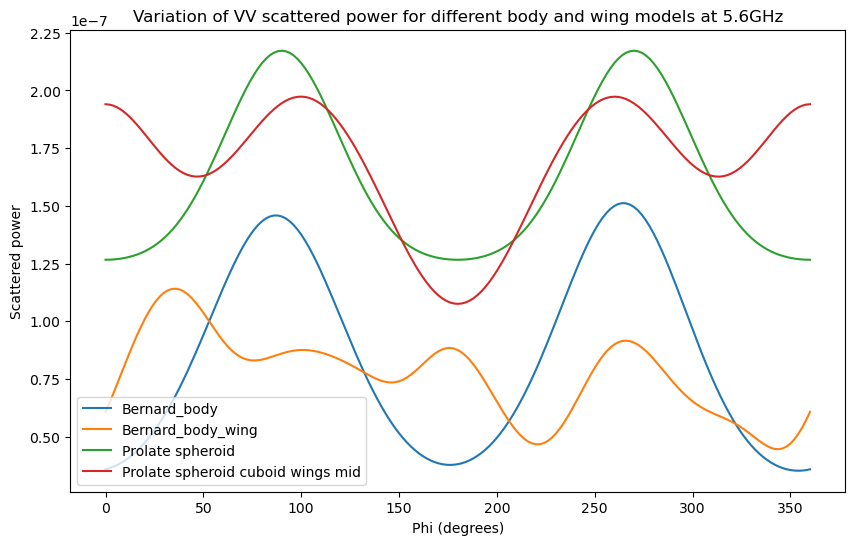

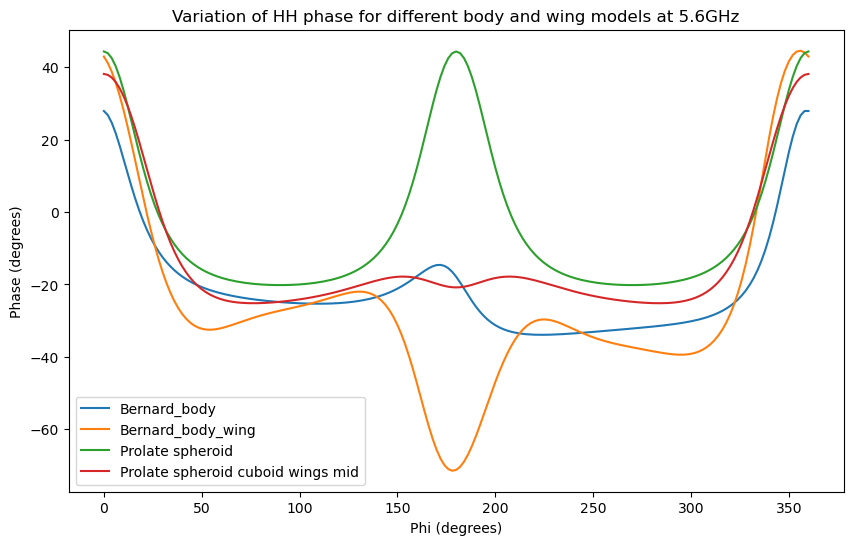

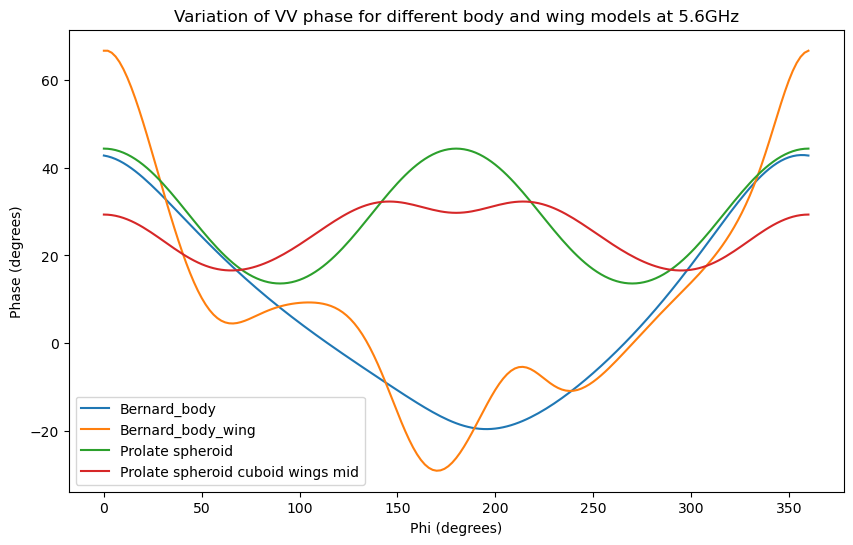

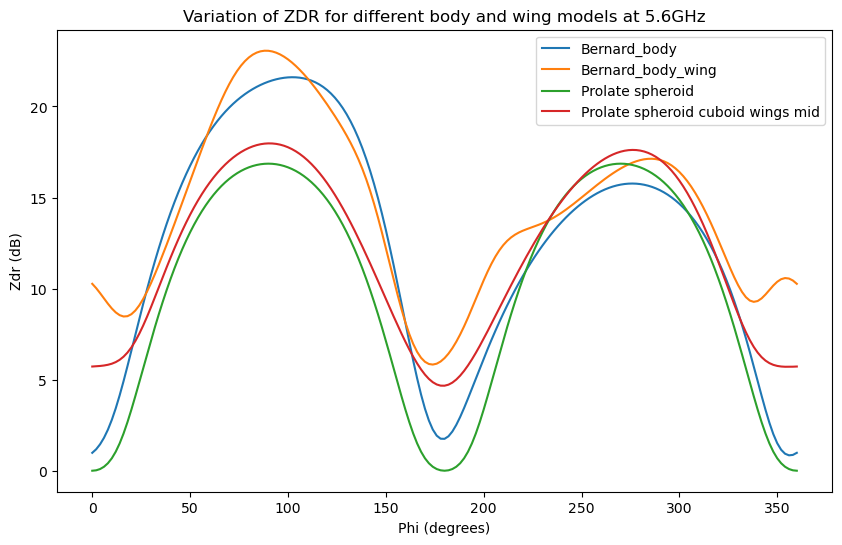

Text(0.5, 1.0, 'Variation of PhiDP for different body and wing models at 5.6GHz')

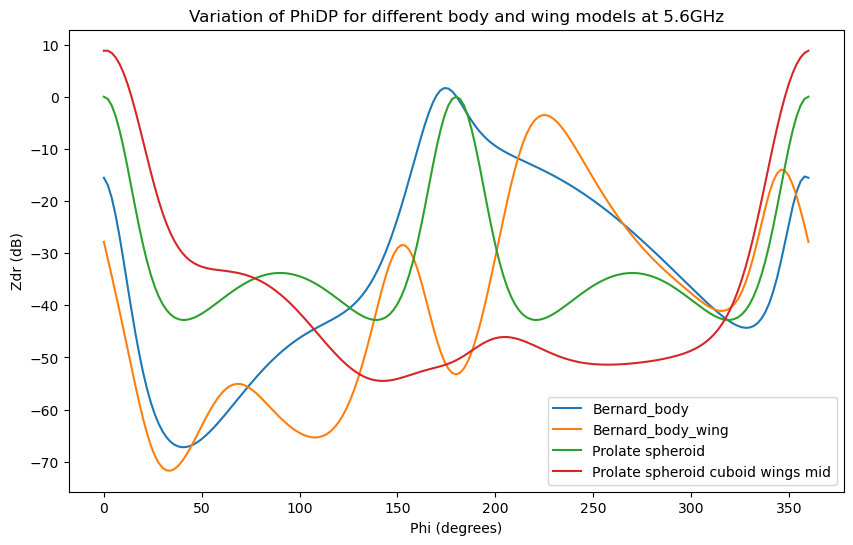

In [10]:
modelling_list = compare_to_bernard_and_ellipsoid_list
title_centre = 'for different body and wing models'

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['HH_power'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Variation of HH scattered power {title_centre} at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['VV_power'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Variation of VV scattered power {title_centre} at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['HH_phase'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase (degrees)')
plt.title(f'Variation of HH phase {title_centre} at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['VV_phase'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase (degrees)')
plt.title(f'Variation of VV phase {title_centre} at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['Zdr'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Zdr (dB)')
plt.title(f'Variation of ZDR {title_centre} at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['PhiDP'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Zdr (dB)')
plt.title(f'Variation of PhiDP {title_centre} at 5.6GHz')

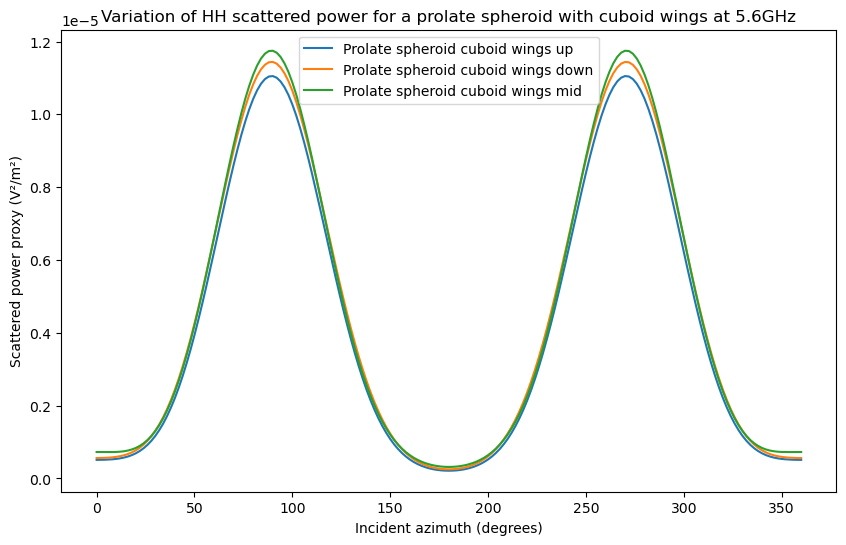

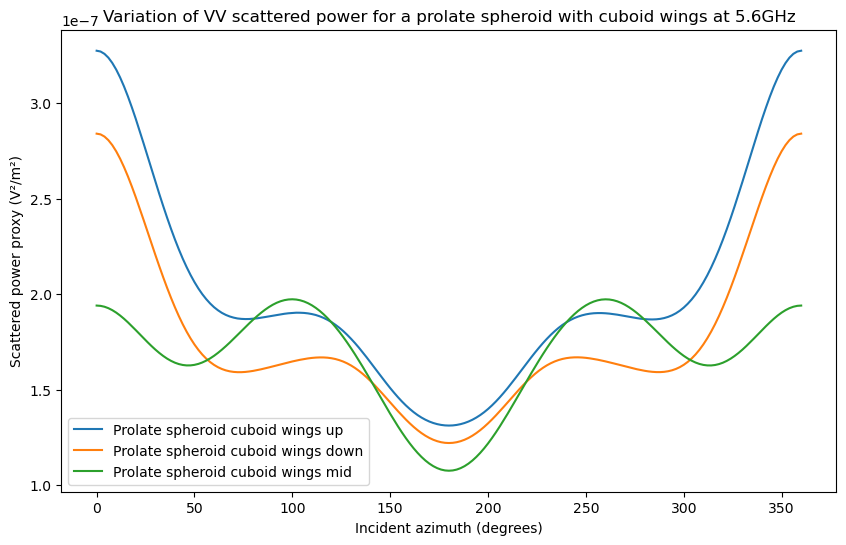

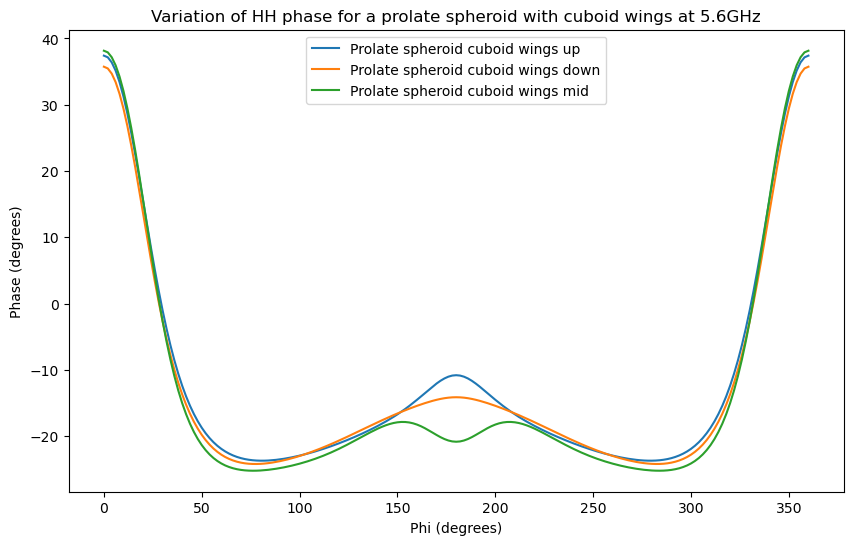

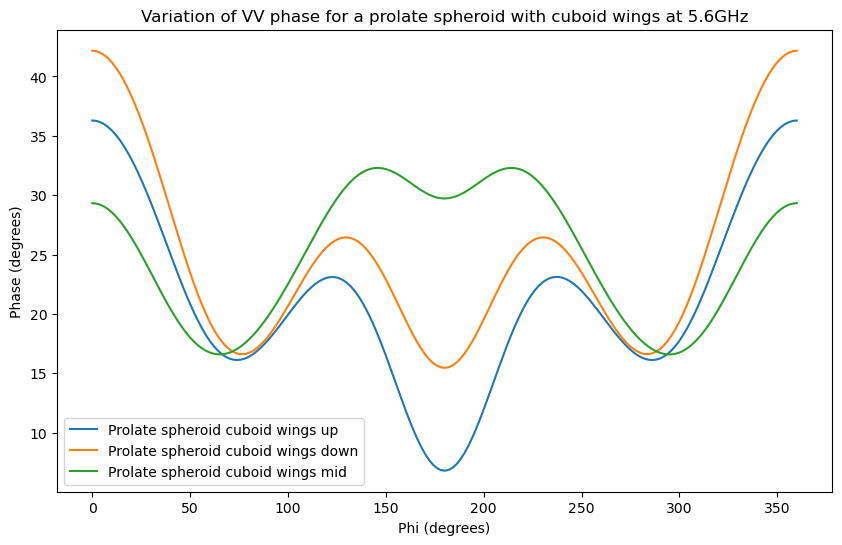

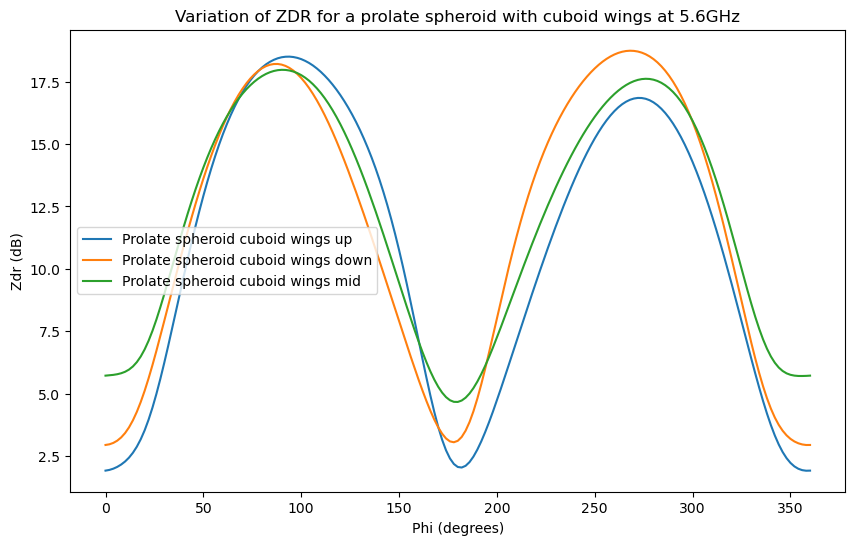

Text(0.5, 1.0, 'Variation of PhiDP for a prolate spheroid with cuboid wings at 5.6GHz')

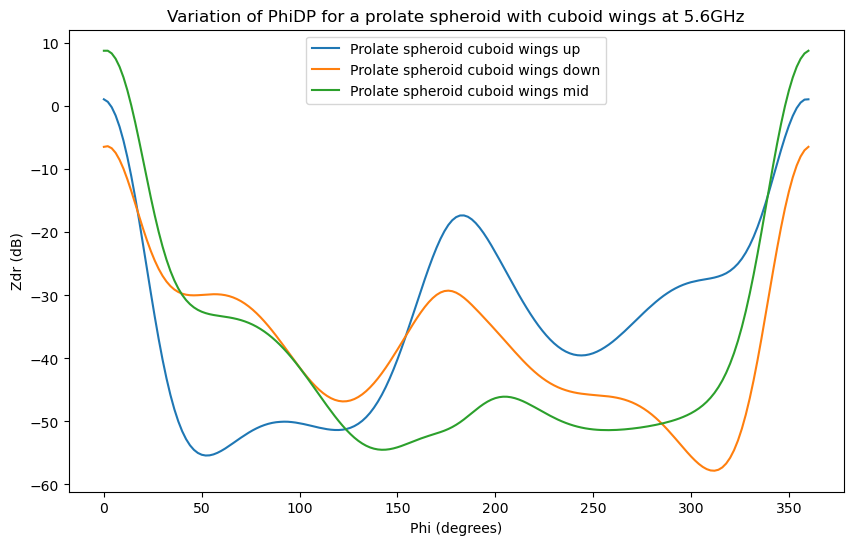

In [14]:
modelling_list = position_variation_list
title_centre = 'for a prolate spheroid with cuboid wings'

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['HH_power'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Scattered power proxy (V²/m²)')
plt.title(f'Variation of HH scattered power {title_centre} at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['VV_power'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Scattered power proxy (V²/m²)')
plt.title(f'Variation of VV scattered power {title_centre} at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['HH_phase'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase (degrees)')
plt.title(f'Variation of HH phase {title_centre} at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['VV_phase'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase (degrees)')
plt.title(f'Variation of VV phase {title_centre} at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['Zdr'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Zdr (dB)')
plt.title(f'Variation of ZDR {title_centre} at 5.6GHz')
plt.show()

for morpho in modelling_list:

   #df_ellipsoid = ellipsoid_results_dict[pol][scale]

    plt.plot(df['phi'], results_dict[morpho]['PhiDP'], label=f'{morpho}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Zdr (dB)')
plt.title(f'Variation of PhiDP {title_centre} at 5.6GHz')